In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
import math

In [3]:

from IPython.display import Image
Image(url="https://miro.medium.com/max/503/1*2foyXif7hwkO8wWB5T9KtQ.png",width = 800, height = 300,)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
import statsmodels.api as sm

In [6]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
import sklearn.metrics as metrics

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [10]:
raw_data = pd.read_csv("data1.csv")

In [11]:
raw_data.head()
# to show output

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [12]:
raw_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   int64  
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  street         4600 non-null   object 
 14  city           4600 non-null   object 
 15  statezip       4600 non-null   object 
 16  country        4600 non-null   object 
dtypes: float64(3), int64(10), object(4)
memory usage: 61

In [13]:
# Added "include="all"" parameter to see all columns. (to see not only numeric ones)
# Based on the unique value count, city can be used by converting to dummies

raw_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,4600.0,NaN,NaN,NaN,551962.988473,563834.702547,0.0,322875.0,460943.46155,654962.5,26590000.0
bedrooms,4600.0,NaN,NaN,NaN,3.40087,0.908848,0.0,3.0,3.0,4.0,9.0
bathrooms,4600.0,NaN,NaN,NaN,2.160815,0.783781,0.0,1.75,2.25,2.5,8.0
sqft_living,4600.0,NaN,NaN,NaN,2139.346957,963.206916,370.0,1460.0,1980.0,2620.0,13540.0
sqft_lot,4600.0,NaN,NaN,NaN,14852.516087,35884.436145,638.0,5000.75,7683.0,11001.25,1074218.0
floors,4600.0,NaN,NaN,NaN,1.512065,0.538288,1.0,1.0,1.5,2.0,3.5
waterfront,4600.0,NaN,NaN,NaN,0.007174,0.084404,0.0,0.0,0.0,0.0,1.0
view,4600.0,NaN,NaN,NaN,0.240652,0.778405,0.0,0.0,0.0,0.0,4.0
condition,4600.0,NaN,NaN,NaN,3.451739,0.67723,1.0,3.0,3.0,4.0,5.0
sqft_above,4600.0,NaN,NaN,NaN,1827.265435,862.168977,370.0,1190.0,1590.0,2300.0,9410.0


In [14]:
# Let's check the accuracy of Linear regression without any data preprocessing

# Define the variables
x1 = raw_data.drop(['price', 'street', 'city', 'statezip', 'country'], axis = 1) 
y = raw_data['price']

# Add a constant. Esentially, we are adding a new column (equal in lenght to x), which consists only of 1's
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an independent x
results = sm.OLS(y,x).fit()
# Print a summary of the model
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     116.1
Date:                Sun, 20 Aug 2023   Prob (F-statistic):          5.03e-235
Time:                        01:24:19   Log-Likelihood:                -66877.
No. Observations:                4600   AIC:                         1.338e+05
Df Residuals:                    4588   BIC:                         1.339e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.584e+06   6.85e+05      6.689      0.000    3.24e+06    5.93e+06
bedrooms      -5.804e+04   1.05e+04     -5.531      0.000   -7.86e+04   -3.75e+04
bathrooms       5.72e+04    1.7e+04      3.363      0.001    2.39e+04    9.05e+04
sqft_living     164.4116      9.779     16.813      0.000     145.241     183.582
sqft_lot         -0.6912      0.213     -3.250      0.001      -1.108      -0.274
floors         3.981e+04   1.87e+04      2.129      0.033    3143.011    7.65e+04
waterfront     3.553e+05   9.38e+04      3.789      0.000    1.71e+05    5.39e+05
view            4.57e+04    1.1e+04      4.167      0.000    2.42e+04    6.72e+04
condition      3.184e+04    1.3e+04      2.441      0.015    6269.622    5.74e+04
sqft_above       97.0378      9.714      9.989      0.000      77.993     116.082
sqft_basement    67.3738     13.661      4.932      0.000      40.591      94.157
yr_built      -2378.2101    341.615     -6.962      0.000   -3047.939   -1708.481
yr_renovated      6.5727      8.634      0.761      0.447     -10.355      23.500
==============================================================================
Omnibus:                    12845.801   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        601962895.549
Skew:                          35.530   Prob(JB):                         0.00
Kurtosis:                    1773.770   Cond. No.                     9.86e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.15e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [15]:
raw_data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [16]:
raw_data[raw_data==0].count()

price              49
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4567
view             4140
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
street              0
city                0
statezip            0
country             0
dtype: int64

In [17]:
zero_price = raw_data[raw_data['price']==0]
zero_price.describe().T

,count,mean,std,min,25%,50%,75%,max
price,49.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00
bedrooms,49.0,3.979592,1.108486,1.0,3.0,4.0,5.0,6.00
bathrooms,49.0,2.698980,1.194584,1.0,2.0,2.5,3.5,6.25
sqft_living,49.0,2787.142857,1354.375625,720.0,1910.0,2600.0,3500.0,8020.00
sqft_lot,49.0,16453.306122,27739.227932,3500.0,6863.0,9000.0,13783.0,188200.00
floors,49.0,1.500000,0.520416,1.0,1.0,1.5,2.0,3.00
waterfront,49.0,0.061224,0.242226,0.0,0.0,0.0,0.0,1.00
view,49.0,0.795918,1.485760,0.0,0.0,0.0,0.0,4.00
condition,49.0,3.673469,0.826331,2.0,3.0,3.0,4.0,5.00
sqft_above,49.0,2295.714286,1337.148708,720.0,1310.0,1990.0,3020.0,8020.00


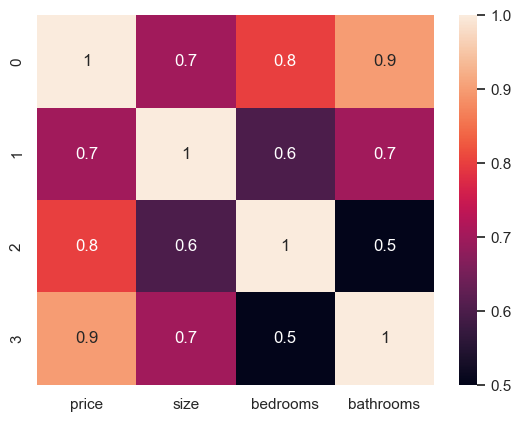

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a correlation matrix
corr_matrix = pd.DataFrame(
    data=[[1, 0.7, 0.8, 0.9], [0.7, 1, 0.6, 0.7], [0.8, 0.6, 1, 0.5], [0.9, 0.7, 0.5, 1]],
    columns=["price", "size", "bedrooms", "bathrooms"],
)

# Create a heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()


In [19]:
# By looking at the median value of the sqft_living variable, which affects the price the most,
# I divided the prices that appear 0 into two groups. 
# Afterwards, I decided on the value that I would assign to the empty prices in these two groups 
# by looking at the median values of the 3 variables that most affected the price value.

low_price_data = raw_data[(raw_data['sqft_living'] < zero_price['sqft_living'].median()) &
         (raw_data['bathrooms'] < zero_price['bathrooms'].median()) &
         (raw_data['sqft_above'] < zero_price['sqft_above'].median()) ]
low_price = low_price_data.price.median()

high_price_data = raw_data[(raw_data['sqft_living'] > zero_price['sqft_living'].median()) &
         (raw_data['bathrooms'] > zero_price['bathrooms'].median()) &
         (raw_data['sqft_above'] > zero_price['sqft_above'].median()) ]
high_price = high_price_data.price.median()

data_prc = raw_data.copy()
data_prc['price'] = np.where(((data_prc['price']==0) & (data_prc['sqft_living'] > zero_price['sqft_living'].median())), high_price, data_prc.price) 
data_prc['price'] = np.where(((data_prc['price']==0) & (data_prc['sqft_living'] <= zero_price['sqft_living'].median())), low_price, data_prc.price)

data_prc.price[data_prc.price==0].count()

0

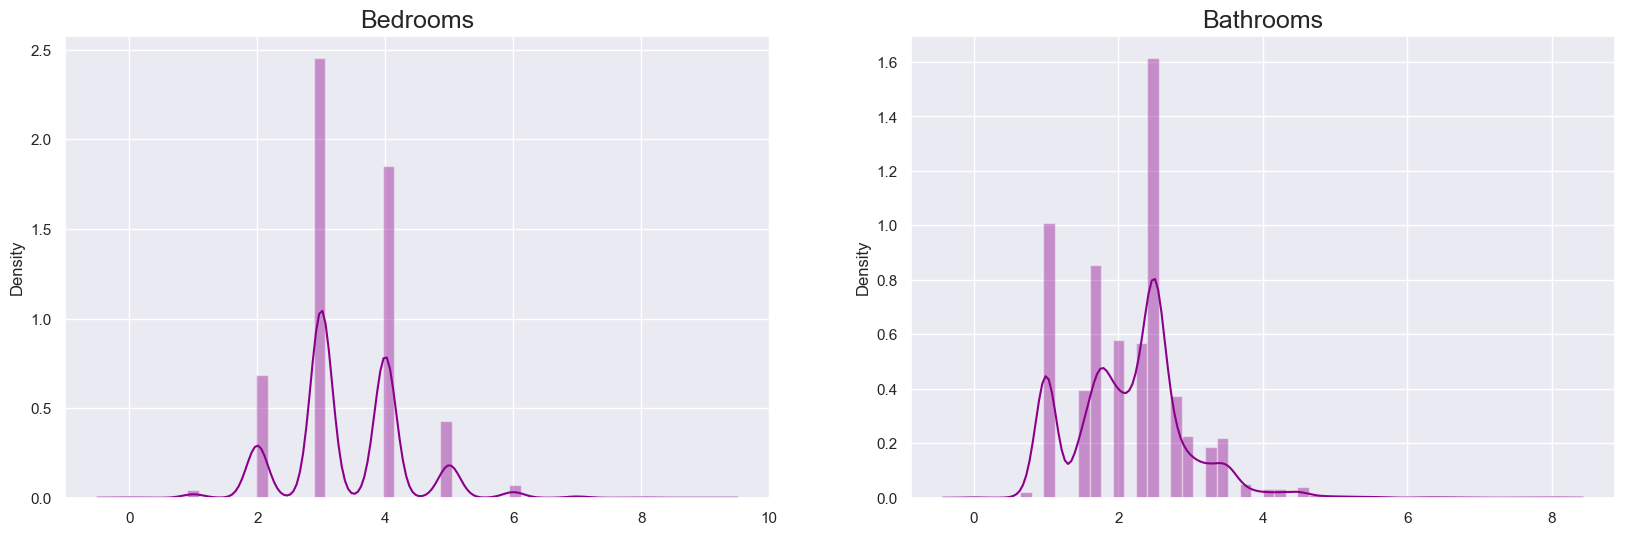

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data
data_prc = pd.read_csv("data1.csv")

# Create the distribution plots
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# Plot the distribution of bedrooms
sns.distplot(ax=ax[0], x=data_prc["bedrooms"], color="darkmagenta")
ax[0].set_title("Bedrooms", size=18)

# Plot the distribution of bathrooms
sns.distplot(ax=ax[1], x=data_prc["bathrooms"], color="darkmagenta")
ax[1].set_title("Bathrooms", size=18)

plt.show()

In [21]:
data_prc.groupby('bedrooms')[['bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']].mean()

,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
bedrooms,,,,,,,,,,,
0,0.000000,3937.000000,16386.000000,2.750000,0.000000,1.000000,3.000000,3937.000000,0.000000,1990.000000,2009.000000
1,1.072368,822.105263,9425.710526,1.144737,0.000000,0.000000,3.263158,771.578947,50.526316,1947.289474,994.684211
2,1.401943,1247.268551,12137.515901,1.303004,0.012367,0.197880,3.434629,1118.971731,128.296820,1954.842756,1014.929329
3,1.996924,1829.022638,13249.980315,1.472195,0.006890,0.187008,3.465551,1595.616634,233.406004,1971.444390,804.400098
4,2.472894,2608.437622,16609.540823,1.627694,0.003919,0.254082,3.416721,2237.169170,371.268452,1976.591117,739.542129
5,2.859065,3140.390935,18985.892351,1.576487,0.014164,0.439093,3.541076,2437.654391,702.736544,1972.586402,750.175637
6,2.979508,3321.606557,24394.918033,1.631148,0.016393,0.901639,3.655738,2488.327869,833.278689,1956.885246,847.737705
7,4.285714,4542.857143,35525.071429,1.714286,0.000000,0.785714,3.357143,3439.285714,1103.571429,1964.000000,1144.357143
8,3.125000,3615.000000,6587.500000,1.500000,0.000000,1.500000,4.000000,2305.000000,1310.000000,1968.000000,1002.000000


In [22]:
data_prc['bedrooms'] = data_prc['bedrooms'].replace(0, np.NaN)
data_prc['bedrooms'] = data_prc['bedrooms'].fillna(data_prc.bedrooms.median())

data_prc.bedrooms[data_prc.bedrooms==0].count()

0

In [23]:
data_prc['bathrooms'].replace(to_replace = 0, value = data_prc.bathrooms.median(), inplace= True)

data_prc.bathrooms[data_prc.bathrooms==0].count()

0

In [24]:
data_prc.groupby('bedrooms')[['bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']].mean()

,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
bedrooms,,,,,,,,,,,
1.0,1.072368,822.105263,9425.710526,1.144737,0.000000,0.000000,3.263158,771.578947,50.526316,1947.289474,994.684211
2.0,1.401943,1247.268551,12137.515901,1.303004,0.012367,0.197880,3.434629,1118.971731,128.296820,1954.842756,1014.929329
3.0,1.997173,1831.095379,13253.063913,1.473451,0.006883,0.187807,3.465093,1597.918879,233.176500,1971.462635,805.584562
4.0,2.472894,2608.437622,16609.540823,1.627694,0.003919,0.254082,3.416721,2237.169170,371.268452,1976.591117,739.542129
5.0,2.859065,3140.390935,18985.892351,1.576487,0.014164,0.439093,3.541076,2437.654391,702.736544,1972.586402,750.175637
6.0,2.979508,3321.606557,24394.918033,1.631148,0.016393,0.901639,3.655738,2488.327869,833.278689,1956.885246,847.737705
7.0,4.285714,4542.857143,35525.071429,1.714286,0.000000,0.785714,3.357143,3439.285714,1103.571429,1964.000000,1144.357143
8.0,3.125000,3615.000000,6587.500000,1.500000,0.000000,1.500000,4.000000,2305.000000,1310.000000,1968.000000,1002.000000
9.0,4.500000,3830.000000,6988.000000,2.500000,0.000000,0.000000,3.000000,2450.000000,1380.000000,1938.000000,2003.000000


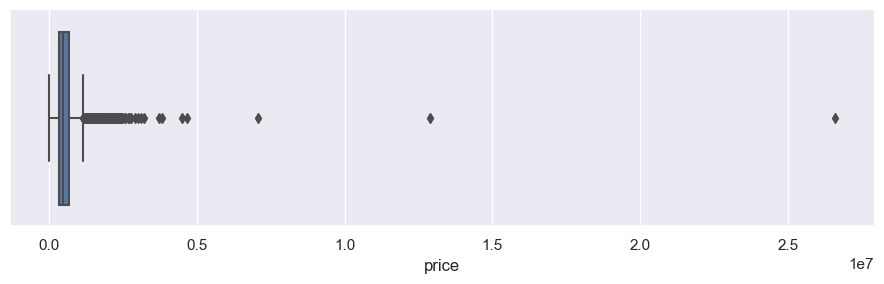

In [25]:
# A great step in the data exploration is to display the boxplot to see outliers

sns.catplot(x='price', data=data_prc, kind='box', height=3, aspect=3)

<Axes: xlabel='price', ylabel='Density'>

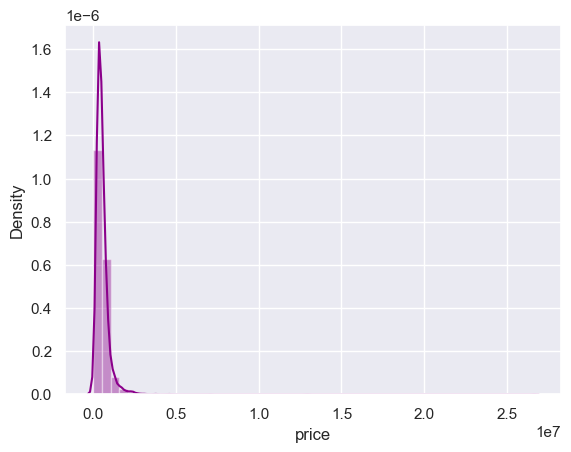

In [26]:
# Also we can print the probability distribution function (PDF) of a variable
# The PDF will show us how that variable is distributed 
# This makes it very easy to spot anomalies, icluded outliers
# The PDF is often the basis on which we decide whether we want to transform a feature

sns.distplot(data_prc.price, color='darkmagenta')

In [27]:
# I will use the IQR measurement for removing outliers.

Q75 = np.percentile(data_prc['price'],75)
Q25 = np.percentile(data_prc['price'],25)
IQR = Q75-Q25
cutoff = IQR * 1.5
upper = Q75 + cutoff
lower = 1

data1 = data_prc[(data_prc['price']<upper)]

24.790932561795774 , 0.6261498827553739


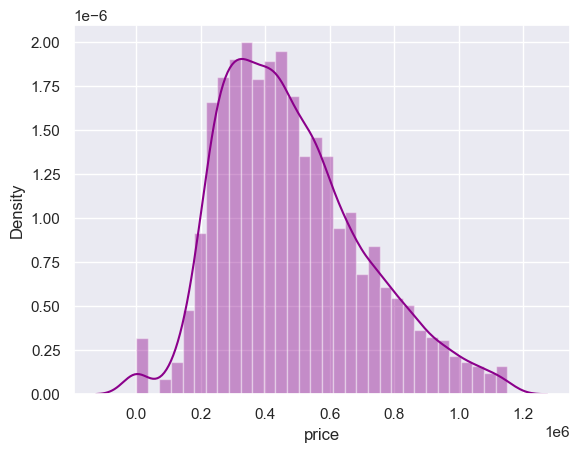

In [28]:
# What a change!

sns.distplot(data1.price, color='darkmagenta') 

print(data_prc['price'].skew(),',', data1['price'].skew())

In [29]:
data1.columns.values

array(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'], dtype=object)

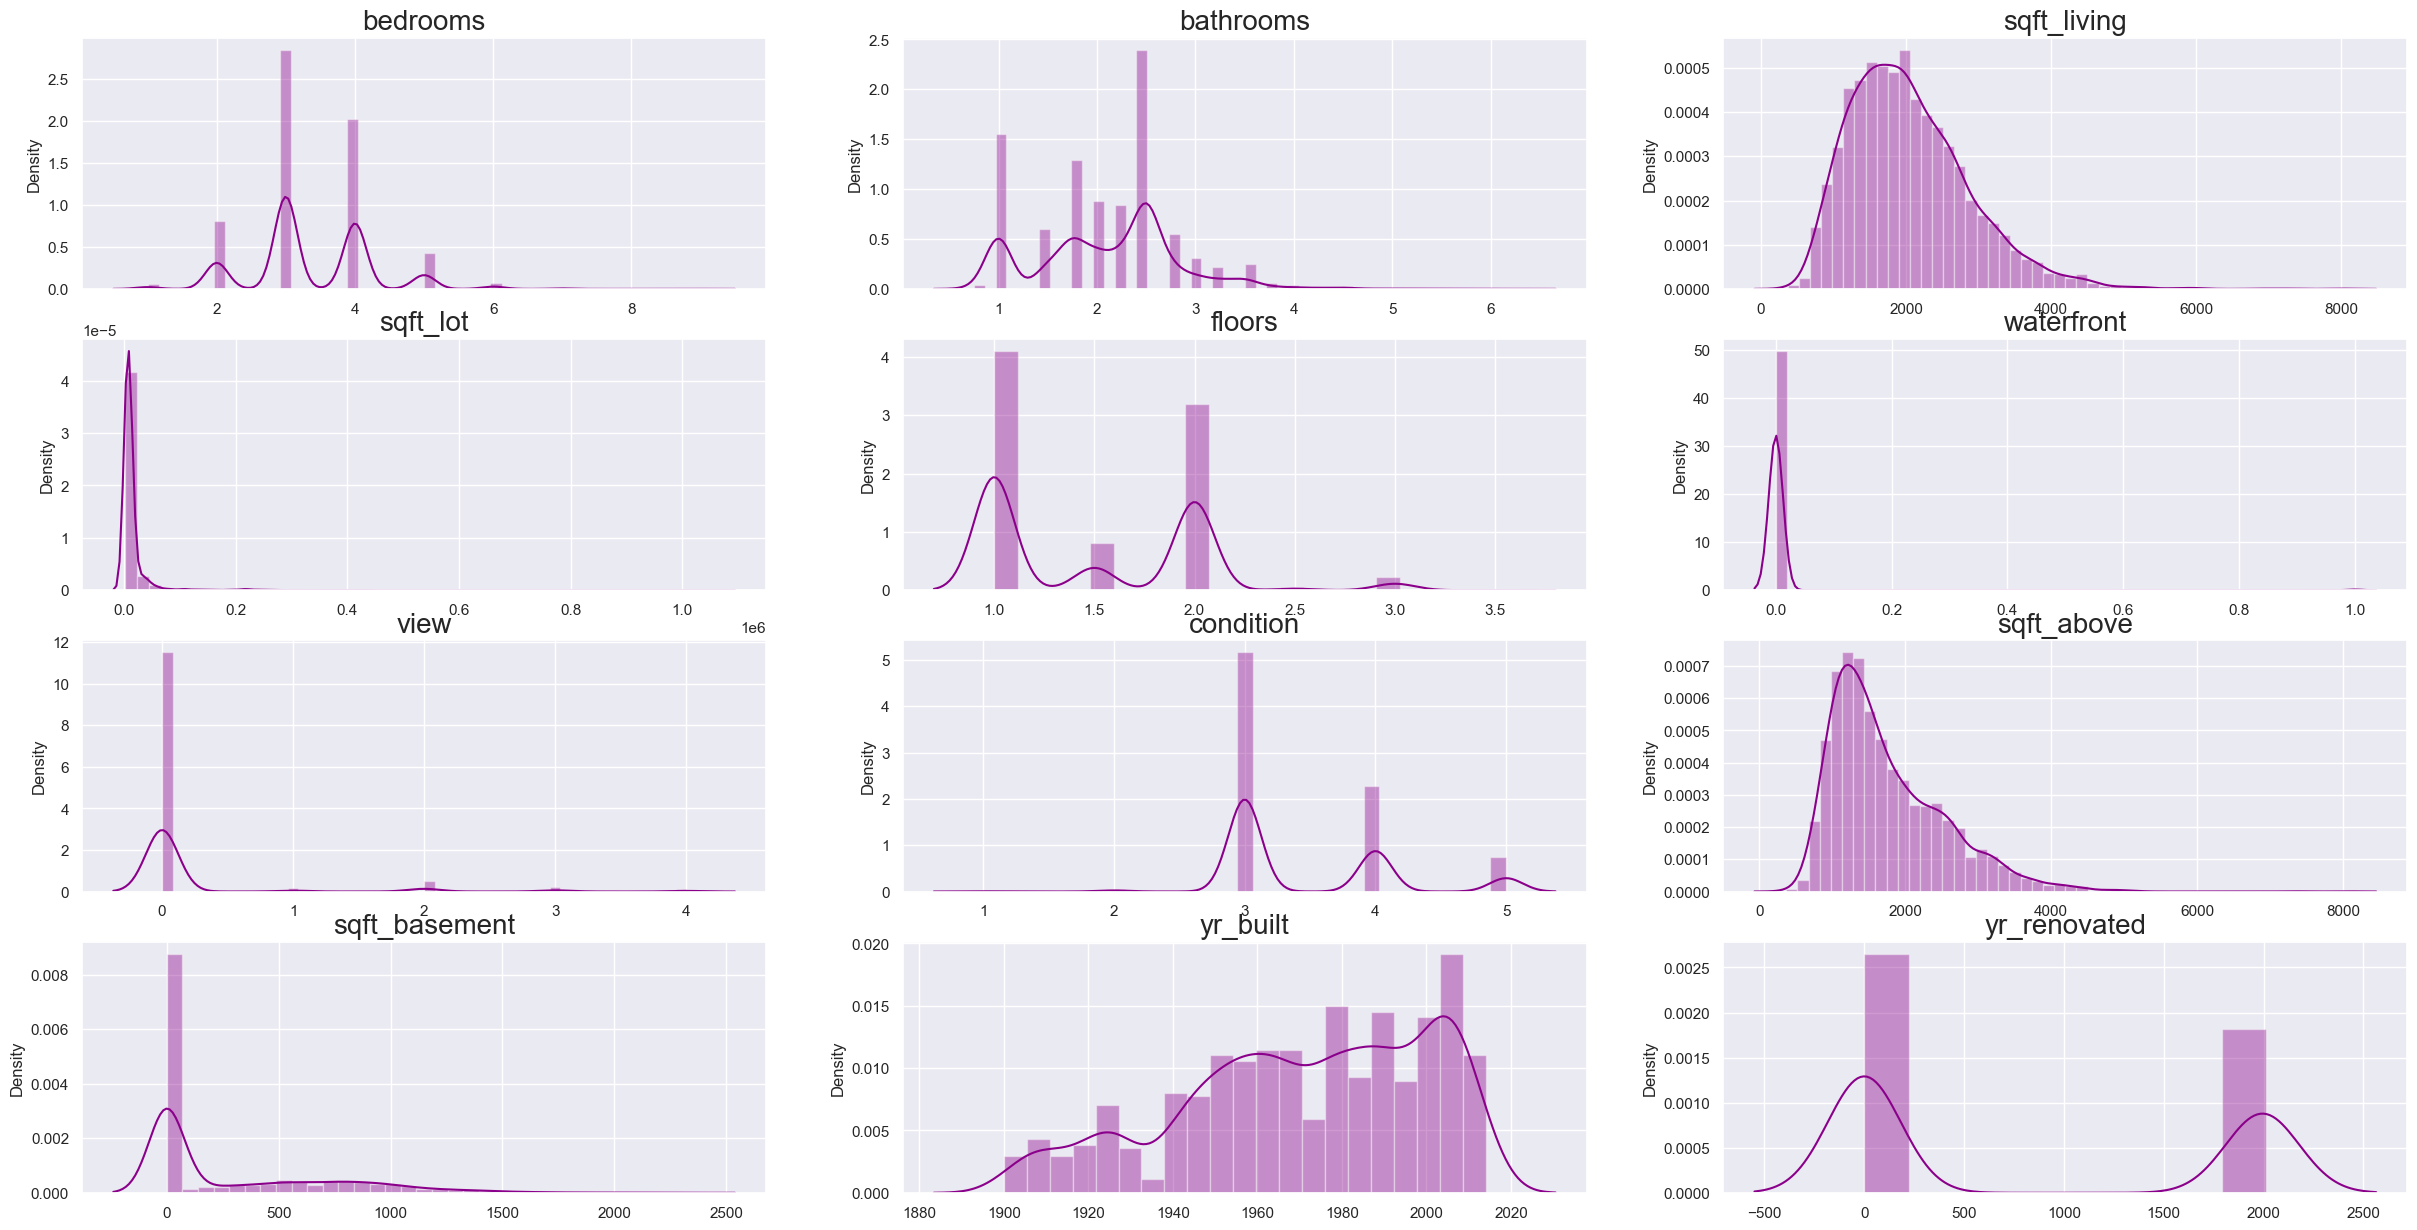

In [30]:
# Let's look other variables.

cols = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']

fig, ax = plt.subplots(4,3, figsize = (30,15))

for idx, col in enumerate(cols):
    rn = math.floor(idx/3)
    cn = idx%3
    sns.distplot(ax=ax[rn,cn], x=data1[col], color='darkmagenta')
    ax[rn,cn].set_title(col, size=20)

bedrooms
1.0      38
2.0     562
3.0    1989
4.0    1413
5.0     297
6.0      49
7.0      10
8.0       1
9.0       1
Name: count, dtype: int64


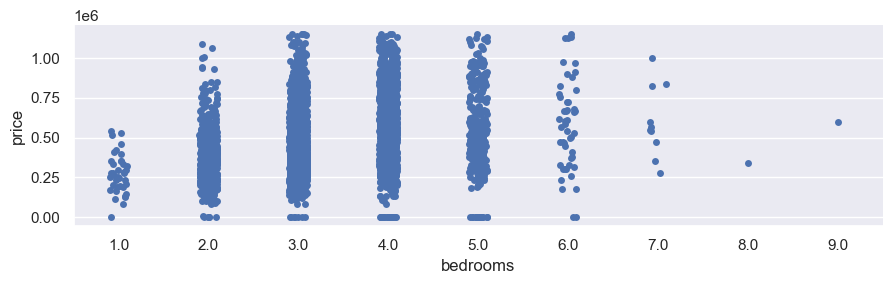

In [31]:
# bedrooms:
print(data1.bedrooms.value_counts().sort_index())
sns.catplot(x='bedrooms', y='price', data=data1, height=3, aspect=3)

In [32]:
data2 = data1[data1.bedrooms<7]

In [33]:
# I could not understand the meaning of 0.75 or 1.25 bathroom houses. 
# I'll first convert their types to integers.

data2.bathrooms.value_counts().sort_index()

bathrooms
0.75      17
1.00     742
1.25       3
1.50     288
1.75     620
2.00     422
2.25     404
2.50    1147
2.75     261
3.00     147
3.25     103
3.50     120
3.75      28
4.00      15
4.25      10
4.50      12
4.75       2
5.00       4
5.25       1
5.50       1
6.25       1
Name: count, dtype: int64

bathrooms
0      17
1    1653
2    2234
3     398
4      39
5       6
6       1
Name: count, dtype: int64


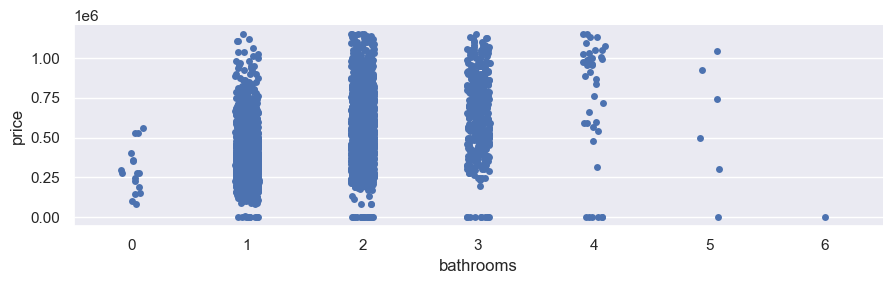

In [34]:
data2.bathrooms = data2.bathrooms.astype(int)
print(data2.bathrooms.value_counts().sort_index())

sns.catplot(x='bathrooms', y='price', data=data2, height=3, aspect=3)

In [35]:
data3 = data2[data2.bathrooms<4]

In [36]:
q = data3.sqft_living.quantile(0.99)
data4 = data3[data3.sqft_living<q]
print(data3.sqft_living.skew(),',', data4.sqft_living.skew())

0.7563015569702389 , 0.5239252061328081


(-100000.0, 1300000.0)

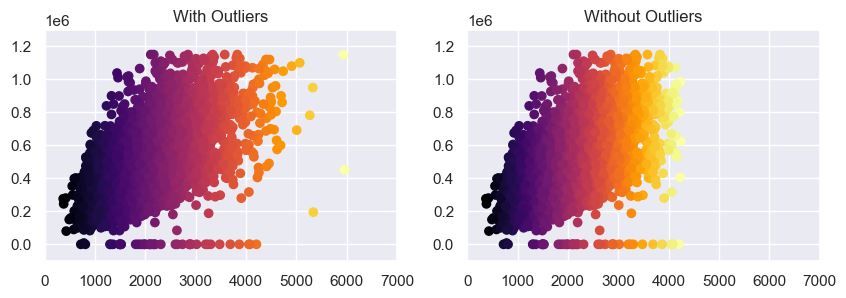

In [37]:
# There is still some skew
# But when we look at the price versus scatter plot, it looks much better now.

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,3))

ax1.scatter(x= 'sqft_living', y= 'price', data = data3, c= 'sqft_living', cmap='inferno')
ax1.set_title('With Outliers')
ax1.set_xlim(0,7000)
ax1.set_ylim(-0.1e6,1.3e6)
ax2.scatter(x= 'sqft_living', y= 'price', data = data4, c= 'sqft_living', cmap='inferno')
ax2.set_title('Without Outliers')
ax2.set_xlim(0,7000)
ax2.set_ylim(-0.1e6,1.3e6)

In [38]:
q = data4.sqft_lot.quantile(0.99)
data5 = data4[data4.sqft_lot<q]

Text(0.5, 1.0, 'Without Outliers')

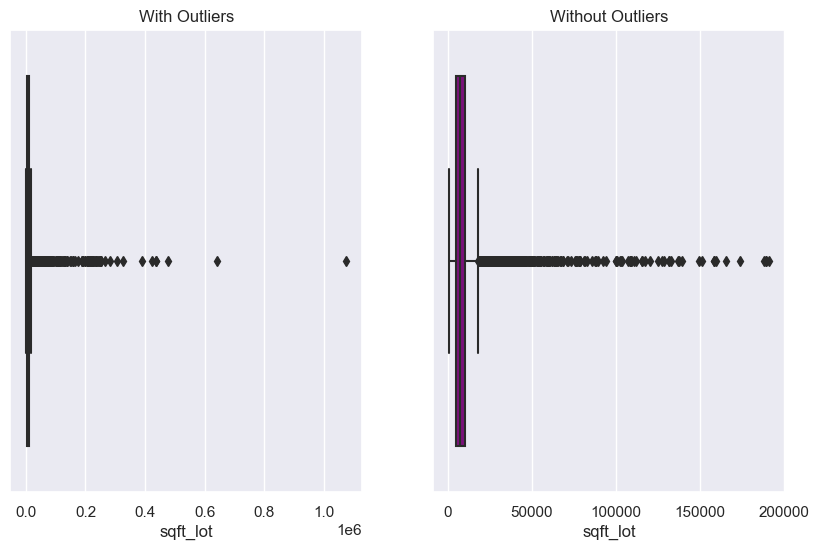

In [39]:
# Let's compare the boxplots this time, there is a visible improvement.

fig, ax = plt.subplots(1,2, figsize=(10,6))

sns.boxplot(ax=ax[0], x=data4.sqft_lot, color = 'darkmagenta')
ax[0].set_title('With Outliers')
sns.boxplot(ax=ax[1], x=data5.sqft_lot, color = 'darkmagenta')
ax[1].set_title('Without Outliers')

In [40]:
data5.floors.value_counts()

floors
1.0    2097
2.0    1565
1.5     409
3.0     119
2.5      23
3.5       2
Name: count, dtype: int64

floors
1    2506
2    1588
3     121
Name: count, dtype: int64


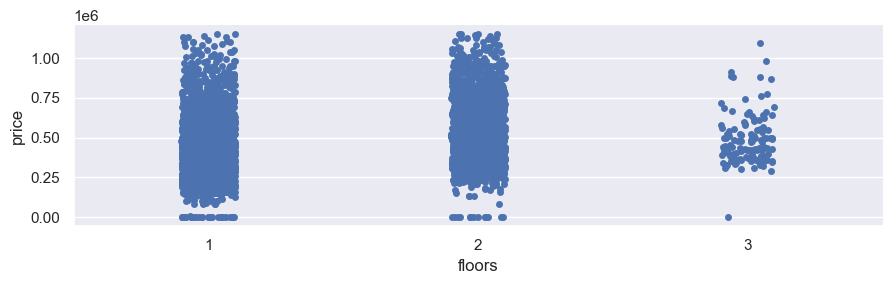

In [41]:
# Again, I will convert the data type to integer.

data6 = data5.copy()
data6.floors = data6.floors.astype(int)
print(data6.floors.value_counts())

sns.catplot(x='floors', y='price', data=data6, height=3, aspect=3)

In [42]:

data6.waterfront.value_counts()

waterfront
0    4199
1      16
Name: count, dtype: int64

In [43]:
print(data6.view.value_counts())

data7=data6.copy()
data7.view = data7.view.map({0:0, 1:1, 2:1, 3:1, 4:1})
print(data7.view.value_counts())

view
0    3911
2     153
3      64
1      54
4      33
Name: count, dtype: int64
view
0    3911
1     304
Name: count, dtype: int64


In [44]:
print(data7.condition.value_counts())

data7 = data7[data7['condition']>1]

condition
3    2622
4    1171
5     386
2      30
1       6
Name: count, dtype: int64


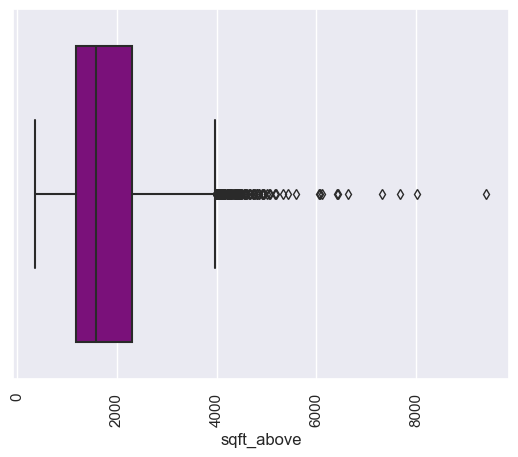

In [45]:
import seaborn as sns
import pandas as pd

# Load the data
data7 = pd.read_csv("data1.csv")

# Create a copy of the data
data8 = data7.copy()

# Create the box plot
sns.boxplot(
    x = "sqft_above",
    data = data8,
    color = "darkmagenta",
    flierprops = {"markerfacecolor": "none"}
)

# Rotate x labels by 90 degrees
plt.xticks(rotation=90)
plt.show()

In [46]:
q = data8.sqft_basement.quantile(0.99)
data9 = data8[data8.sqft_basement<q]

(-100000.0, 1250000.0)

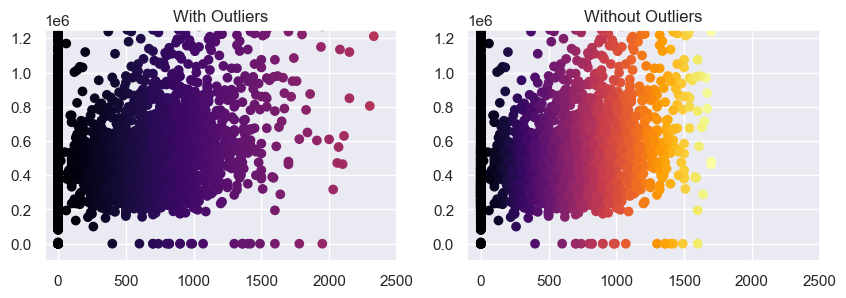

In [47]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,3))

ax1.scatter(x= 'sqft_basement', y= 'price', data = data8, c= 'sqft_basement', cmap='inferno')
ax1.set_title('With Outliers')
ax1.set_xlim(-100,2500)
ax1.set_ylim(-0.1e6,1.25e6)
ax2.scatter(x= 'sqft_basement', y= 'price', data = data9, c= 'sqft_basement', cmap='inferno')
ax2.set_title('Without Outliers')
ax2.set_xlim(-100,2500)
ax2.set_ylim(-0.1e6,1.25e6)

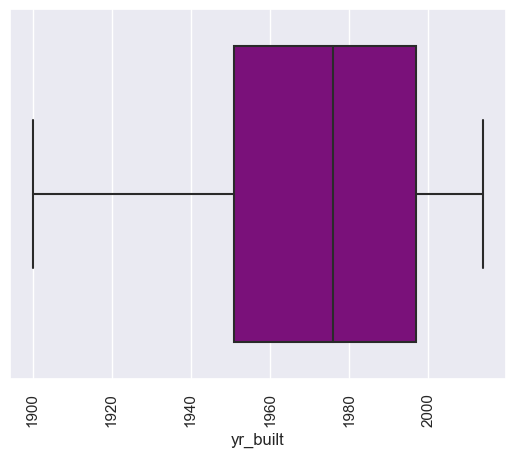

In [48]:
import seaborn as sns
import pandas as pd

# Load the data
data9 = pd.read_csv("data1.csv")

# Create the box plot
sns.boxplot(
    x = "yr_built",
    data = data9,
    color = "darkmagenta",
    flierprops = {"markerfacecolor": "none"}
)

# Rotate x labels by 90 degrees
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='yr_renovated', ylabel='Density'>

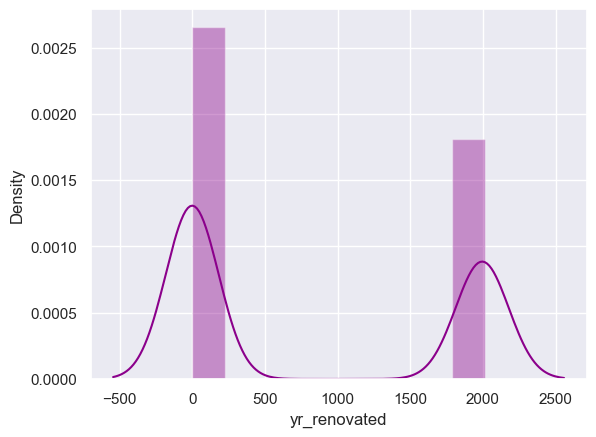

In [49]:
sns.distplot(data9.yr_renovated, color= 'darkmagenta')

In [50]:
import pandas as pd
import numpy as np

data9 = pd.read_csv("data1.csv")

data9['yr_renovated'] = np.where(data9['yr_renovated'] == 0, 0, 1)

In [51]:
data_pp = data9.drop(['city', 'street', 'statezip', 'country'], axis=1)
data_pp.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.46155,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.00000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.25000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.00000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.00000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.50000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.00000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.00000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.00000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.00000,2300.00,9410.0


In [52]:
data_pp = data_pp.reset_index(drop=True)

In [53]:
targets = data_pp.iloc[:,:1]
unscaled_inputs = data_pp.drop(['price'], axis = 1)

unscaled_inputs.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,1
1,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1


In [54]:
x_train, x_test, y_train, y_test = train_test_split(unscaled_inputs, targets, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(3680, 12) (3680, 1) (920, 12) (920, 1)


In [55]:
columns_to_scale = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
        'condition', 'sqft_above', 'sqft_basement',
       'yr_built']
columns_to_omit = ['waterfront','view','yr_renovated']
x_train_to_scale = x_train[columns_to_scale]
x_test_to_scale = x_test[columns_to_scale]
x_train_not_to_scale = x_train[columns_to_omit].reset_index(drop=True)
x_test_not_to_scale = x_test[columns_to_omit].reset_index(drop=True)

In [56]:
scaler = RobustScaler()  #StandardScaler()
scaler.fit(x_train_to_scale)

RobustScaler()

In [57]:
x_train_scaled = scaler.transform(x_train_to_scale)

In [58]:
x_test_scaled = scaler.transform(x_test_to_scale)

In [59]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=columns_to_scale)
x_train = pd.concat([x_train_scaled,x_train_not_to_scale], axis=1)
y_train = y_train.reset_index(drop=True)

x_test_scaled = pd.DataFrame(x_test_scaled, columns=columns_to_scale)
x_test = pd.concat([x_test_scaled,x_test_not_to_scale], axis=1)
y_test = y_test.reset_index(drop=True)

In [60]:
x_train.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,waterfront,view,yr_renovated
0,1.0,0.333333,0.685466,6.251384,0.5,1.0,1.062500,0.0,0.304348,0,0,0
1,1.0,1.000000,1.509761,3.529130,0.5,0.0,1.910714,0.0,0.347826,0,0,0


In [61]:
x = sm.add_constant(x_train)
results = sm.OLS(y_train, x).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     398.1
Date:                Sun, 20 Aug 2023   Prob (F-statistic):               0.00
Time:                        01:24:25   Log-Likelihood:                -51027.
No. Observations:                3680   AIC:                         1.021e+05
Df Residuals:                    3668   BIC:                         1.022e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.154e+05   7601.235     54.654      0.000    4.01e+05     4.3e+05
bedrooms       -6.45e+04   6007.470    -10.736      0.000   -7.63e+04   -5.27e+04
bathrooms      2.739e+04   7271.309      3.767      0.000    1.31e+04    4.16e+04
sqft_living    1.136e+05   5216.140     21.770      0.000    1.03e+05    1.24e+05
sqft_lot      -3111.8885    735.386     -4.232      0.000   -4553.695   -1670.082
floors          6.98e+04   1.07e+04      6.534      0.000    4.89e+04    9.07e+04
condition       2.93e+04   7418.976      3.949      0.000    1.48e+04    4.38e+04
sqft_above     2.065e+05   4961.836     41.619      0.000    1.97e+05    2.16e+05
sqft_basement  1.078e+05   6108.186     17.648      0.000    9.58e+04     1.2e+05
yr_built      -1.182e+05   8933.682    -13.231      0.000   -1.36e+05   -1.01e+05
waterfront     3.825e+05    5.3e+04      7.222      0.000    2.79e+05    4.86e+05
view           4.476e+04   6275.383      7.132      0.000    3.25e+04    5.71e+04
yr_renovated   1.645e+04   9847.572      1.671      0.095   -2854.372    3.58e+04
==============================================================================
Omnibus:                     1999.346   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           111367.432
Skew:                           1.825   Prob(JB):                         0.00
Kurtosis:                      29.702   Cond. No.                     3.79e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.22e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [62]:
x_train_pv = x_train.drop(['yr_renovated'], axis=1)

In [63]:

X = sm.add_constant(x_train_pv)
results = sm.OLS(y_train, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     437.4
Date:                Sun, 20 Aug 2023   Prob (F-statistic):               0.00
Time:                        01:24:25   Log-Likelihood:                -51028.
No. Observations:                3680   AIC:                         1.021e+05
Df Residuals:                    3669   BIC:                         1.021e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.229e+05   6160.220     68.647      0.000    4.11e+05    4.35e+05
bedrooms      -6.417e+04   6005.820    -10.685      0.000   -7.59e+04   -5.24e+04
bathrooms      2.684e+04   7265.535      3.694      0.000    1.26e+04    4.11e+04
sqft_living    1.127e+05   5189.413     21.708      0.000    1.02e+05    1.23e+05
sqft_lot      -3112.1701    735.566     -4.231      0.000   -4554.328   -1670.012
floors         6.759e+04   1.06e+04      6.375      0.000    4.68e+04    8.84e+04
condition      2.469e+04   6888.924      3.584      0.000    1.12e+04    3.82e+04
sqft_above     2.078e+05   4900.633     42.406      0.000    1.98e+05    2.17e+05
sqft_basement  1.086e+05   6092.210     17.821      0.000    9.66e+04    1.21e+05
yr_built      -1.231e+05   8438.803    -14.589      0.000    -1.4e+05   -1.07e+05
waterfront      3.83e+05    5.3e+04      7.231      0.000    2.79e+05    4.87e+05
view           4.499e+04   6275.381      7.169      0.000    3.27e+04    5.73e+04
==============================================================================
Omnibus:                     2001.017   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           111551.713
Skew:                           1.827   Prob(JB):                         0.00
Kurtosis:                      29.724   Cond. No.                     3.81e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.14e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [64]:
data_wd = data9.drop([ 'street', 'statezip', 'country'], axis=1)

In [65]:
city_dummies = pd.get_dummies(data_wd.city, drop_first = True)
city_dummies

,Auburn,Beaux Arts Village,Bellevue,Black Diamond,Bothell,Burien,Carnation,Clyde Hill,Covington,Des Moines,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4596,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4598,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [66]:
targets = data_wd.iloc[:,:1]

a = data_wd.drop(['price','city'], axis = 1)
unscaled_inputs_wd = pd.concat([a, city_dummies], axis=1)
unscaled_inputs_wd.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,3,1.5,1340,7912,1.5,0,0,3,1340,0,...,False,False,True,False,False,False,False,False,False,False
1,5,2.5,3650,9050,2.0,0,4,5,3370,280,...,False,True,False,False,False,False,False,False,False,False


In [67]:
x_train, x_test, y_train, y_test = train_test_split(unscaled_inputs_wd, targets, test_size=0.2, random_state = 42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3680, 55) (920, 55) (3680, 1) (920, 1)


In [68]:
x_train.columns.values

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'Auburn', 'Beaux Arts Village',
       'Bellevue', 'Black Diamond', 'Bothell', 'Burien', 'Carnation',
       'Clyde Hill', 'Covington', 'Des Moines', 'Duvall', 'Enumclaw',
       'Fall City', 'Federal Way', 'Inglewood-Finn Hill', 'Issaquah',
       'Kenmore', 'Kent', 'Kirkland', 'Lake Forest Park', 'Maple Valley',
       'Medina', 'Mercer Island', 'Milton', 'Newcastle', 'Normandy Park',
       'North Bend', 'Pacific', 'Preston', 'Ravensdale', 'Redmond',
       'Renton', 'Sammamish', 'SeaTac', 'Seattle', 'Shoreline',
       'Skykomish', 'Snoqualmie', 'Snoqualmie Pass', 'Tukwila', 'Vashon',
       'Woodinville', 'Yarrow Point'], dtype=object)

In [69]:
columns_to_scale = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built']
columns_to_omit = ['waterfront','view','yr_renovated', 'Auburn', 'Beaux Arts Village',
       'Bellevue', 'Black Diamond', 'Bothell', 'Burien', 'Carnation',
       'Clyde Hill', 'Covington', 'Des Moines', 'Duvall', 'Enumclaw',
       'Fall City', 'Federal Way', 'Inglewood-Finn Hill', 'Issaquah',
       'Kenmore', 'Kent', 'Kirkland', 'Lake Forest Park', 'Maple Valley',
       'Medina', 'Mercer Island', 'Milton', 'Newcastle', 'Normandy Park',
       'North Bend', 'Pacific', 'Preston', 'Ravensdale', 'Redmond',
       'Renton', 'Sammamish', 'SeaTac', 'Seattle', 'Shoreline',
       'Skykomish', 'Snoqualmie', 'Snoqualmie Pass', 'Tukwila', 'Vashon',
       'Woodinville', 'Yarrow Point']
x_train_to_scale = x_train[columns_to_scale]
x_test_to_scale = x_test[columns_to_scale]
x_train_not_to_scale = x_train[columns_to_omit].reset_index(drop=True)
x_test_not_to_scale = x_test[columns_to_omit].reset_index(drop=True)

In [70]:
scaler = RobustScaler()

In [71]:
scaler.fit(x_train_to_scale)

RobustScaler()

In [72]:
x_train_scaled = scaler.transform(x_train_to_scale)

In [73]:
x_test_scaled = scaler.transform(x_test_to_scale)



In [74]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=columns_to_scale)
x_train = pd.concat([x_train_scaled,x_train_not_to_scale], axis=1)
y_train = y_train.reset_index(drop=True)

x_test_scaled = pd.DataFrame(x_test_scaled, columns=columns_to_scale)
x_test = pd.concat([x_test_scaled,x_test_not_to_scale], axis=1)
y_test = y_test.reset_index(drop=True)

In [75]:
x_train.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,sqft_above,sqft_basement,yr_built,waterfront,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,1.0,0.333333,0.685466,6.251384,0.5,1.0,1.062500,0.0,0.304348,0,...,False,False,False,False,False,False,False,False,True,False
1,1.0,1.000000,1.509761,3.529130,0.5,0.0,1.910714,0.0,0.347826,0,...,False,False,False,False,False,False,False,False,False,False


In [76]:
import pandas as pd
import statsmodels.api as sm

# Create the training data
x_train = pd.DataFrame({'area': [100, 150, 200]})

# Convert the 'area' column to a numeric data type
x_train['area'] = x_train['area'].astype('float')

# Create the target variable
y_train = pd.Series([50000, 75000, 100000], name='price')

# Add a column of ones to the training data
x = sm.add_constant(x_train)

# Fit the linear regression model
results = sm.OLS(y_train, x).fit()

# Print the summary of the linear regression model
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.968e+30
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           4.54e-16
Time:                        01:24:25   Log-Likelihood:                 70.603
No. Observations:                   3   AIC:                            -137.2
Df Residuals:                       1   BIC:                            -139.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.02e-11   5.54e-11     -0.184      0.8

C:\Users\mulan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [77]:
if 'yr_renovated' in x_train.columns:
    x_train_pv = x_train.drop('yr_renovated', axis=1)
else:
    x_train_pv = x_train.assign(yr_renovated=0).drop('yr_renovated', axis=1)

In [78]:
# R2 and Adj. R2 is the same as before. 
# We did well by removing it out, because it's always better to keep the equation simple.

X = sm.add_constant(x_train_pv)
results = sm.OLS(y_train, X).fit()

results.summary()

C:\Users\mulan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.968e+30
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           4.54e-16
Time:                        01:24:25   Log-Likelihood:                 70.603
No. Observations:                   3   AIC:                            -137.2
Df Residuals:                       1   BIC:                            -139.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.02e-11   5.54e-11     -0.184      0.884   -7.14e-10    6.94e-10
area         500.0000   3.56e-13    1.4e+15      0.000     500.000     500.000
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.000
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                         592.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
data_wd = data9.drop(['street', 'statezip', 'country'], axis=1)

In [80]:
# Get_dummies is one of the common ways to create dummy variables for categorical features

city_dummies = pd.get_dummies(data_wd.city, drop_first = True)
city_dummies

,Auburn,Beaux Arts Village,Bellevue,Black Diamond,Bothell,Burien,Carnation,Clyde Hill,Covington,Des Moines,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4596,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4598,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [81]:
# Let's define the variables one more time.

targets = data_wd.iloc[:,:1]

a = data_wd.drop(['price','city'], axis = 1)
unscaled_inputs_wd = pd.concat([a, city_dummies], axis=1)
unscaled_inputs_wd.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,3,1.5,1340,7912,1.5,0,0,3,1340,0,...,False,False,True,False,False,False,False,False,False,False
1,5,2.5,3650,9050,2.0,0,4,5,3370,280,...,False,True,False,False,False,False,False,False,False,False


In [82]:
# Split the targets and inputs into train-test data again.

x_train, x_test, y_train, y_test = train_test_split(unscaled_inputs_wd, targets, test_size=0.2, random_state = 42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3680, 55) (920, 55) (3680, 1) (920, 1)


In [83]:
x_train.columns.values

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'Auburn', 'Beaux Arts Village',
       'Bellevue', 'Black Diamond', 'Bothell', 'Burien', 'Carnation',
       'Clyde Hill', 'Covington', 'Des Moines', 'Duvall', 'Enumclaw',
       'Fall City', 'Federal Way', 'Inglewood-Finn Hill', 'Issaquah',
       'Kenmore', 'Kent', 'Kirkland', 'Lake Forest Park', 'Maple Valley',
       'Medina', 'Mercer Island', 'Milton', 'Newcastle', 'Normandy Park',
       'North Bend', 'Pacific', 'Preston', 'Ravensdale', 'Redmond',
       'Renton', 'Sammamish', 'SeaTac', 'Seattle', 'Shoreline',
       'Skykomish', 'Snoqualmie', 'Snoqualmie Pass', 'Tukwila', 'Vashon',
       'Woodinville', 'Yarrow Point'], dtype=object)

In [84]:
columns_to_scale = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built']
columns_to_omit = ['waterfront','view','yr_renovated', 'Auburn', 'Beaux Arts Village',
       'Bellevue', 'Black Diamond', 'Bothell', 'Burien', 'Carnation',
       'Clyde Hill', 'Covington', 'Des Moines', 'Duvall', 'Enumclaw',
       'Fall City', 'Federal Way', 'Inglewood-Finn Hill', 'Issaquah',
       'Kenmore', 'Kent', 'Kirkland', 'Lake Forest Park', 'Maple Valley',
       'Medina', 'Mercer Island', 'Milton', 'Newcastle', 'Normandy Park',
       'North Bend', 'Pacific', 'Preston', 'Ravensdale', 'Redmond',
       'Renton', 'Sammamish', 'SeaTac', 'Seattle', 'Shoreline',
       'Skykomish', 'Snoqualmie', 'Snoqualmie Pass', 'Tukwila', 'Vashon',
       'Woodinville', 'Yarrow Point']
x_train_to_scale = x_train[columns_to_scale]
x_test_to_scale = x_test[columns_to_scale]
x_train_not_to_scale = x_train[columns_to_omit].reset_index(drop=True)
x_test_not_to_scale = x_test[columns_to_omit].reset_index(drop=True)

In [85]:
scaler = RobustScaler()

In [86]:
scaler.fit(x_train_to_scale)

RobustScaler()

In [87]:
x_train_scaled = scaler.transform(x_train_to_scale)

In [88]:
x_test_scaled = scaler.transform(x_test_to_scale)

In [89]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=columns_to_scale)
x_train = pd.concat([x_train_scaled,x_train_not_to_scale], axis=1)
y_train = y_train.reset_index(drop=True)

x_test_scaled = pd.DataFrame(x_test_scaled, columns=columns_to_scale)
x_test = pd.concat([x_test_scaled,x_test_not_to_scale], axis=1)
y_test = y_test.reset_index(drop=True)

In [90]:
import pandas as pd
import statsmodels.api as sm

# Create the training data
x_train = pd.DataFrame({'area': [100, 150, 200]})

# Convert the 'area' column to a numeric data type
x_train['area'] = x_train['area'].astype('float')

# Create the target variable
y_train = pd.DataFrame({'price': [50000, 75000, 100000]})

# Fit the linear regression model
results = sm.OLS(y_train, x_train).fit()

# Print the summary of the linear regression model
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.902e+31
Date:                Sun, 20 Aug 2023   Prob (F-statistic):                    5.26e-32
Time:                        01:24:25   Log-Likelihood:                          68.955
No. Observations:                   3   AIC:                                     -135.9
Df Residuals:                       2   BIC:                                     -136.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\mulan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [91]:
# Yey! We managed to get much better results now.
# 'sqft_lot' and 'yr_renovated' features seems insignificant when we evaluate them according to their p-values.

x_train = sm.add_constant(x_train)
results = sm.OLS(y_train, x_train).fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.968e+30
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           4.54e-16
Time:                        01:24:25   Log-Likelihood:                 70.603
No. Observations:                   3   AIC:                            -137.2
Df Residuals:                       1   BIC:                            -139.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.02e-11   5.54e-11     -0.184      0.8

C:\Users\mulan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [92]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Create the training data
x_train = pd.DataFrame({'area': [100, 150, 200]})

# Convert the 'area' column to a numeric data type
x_train['area'] = x_train['area'].astype('float')

# Create the target variable
y_train = pd.DataFrame({'price': [50000, 75000, 100000]})

# Fit the linear regression model
results = sm.OLS(y_train, sm.add_constant(x_train)).fit()  # Adding constant column

# Print the summary of the linear regression model
print(results.summary())

# Assuming you have x_train_to_scale, x_test_to_scale, columns_to_scale, x_train_not_to_scale, x_test_not_to_scale, y_test, y_train

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the training features
x_train_scaled = scaler.fit_transform(x_train_to_scale)
x_train_scaled = pd.DataFrame(x_train_scaled, columns=columns_to_scale)
x_train_final = pd.concat([x_train_scaled, x_train_not_to_scale], axis=1)

# Scale the testing features
x_test_scaled = scaler.transform(x_test_to_scale)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=columns_to_scale)
x_test_final = pd.concat([x_test_scaled, x_test_not_to_scale], axis=1)

# Reset the index of y_train and y_test
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Now you can use x_train_final, y_train, x_test_final, y_test for further analysis or modeling


C:\Users\mulan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.968e+30
Date:                Sun, 20 Aug 2023   Prob (F-statistic):           4.54e-16
Time:                        01:24:25   Log-Likelihood:                 70.603
No. Observations:                   3   AIC:                            -137.2
Df Residuals:                       1   BIC:                            -139.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.02e-11   5.54e-11     -0.184      0.8

In [93]:
column_names = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'condition', 'sqft_above', 'sqft_basement', 'yr_built',
    'waterfront', 'view', 'yr_renovated', 'Auburn',
    'Beaux Arts Village', 'Bellevue', 'Black Diamond', 'Bothell',
    'Burien', 'Carnation', 'Clyde Hill', 'Covington', 'Des Moines',
    'Duvall', 'Enumclaw', 'Fall City', 'Federal Way',
    'Inglewood-Finn Hill', 'Issaquah', 'Kenmore', 'Kent', 'Kirkland',
    'Lake Forest Park', 'Maple Valley', 'Medina', 'Mercer Island',
    'Milton', 'Newcastle', 'Normandy Park', 'North Bend', 'Pacific',
    'Preston', 'Ravensdale', 'Redmond', 'Renton', 'Sammamish',
    'SeaTac', 'Seattle', 'Shoreline', 'Skykomish', 'Snoqualmie',
    'Snoqualmie Pass', 'Tukwila', 'Vashon', 'Woodinville',
    'Yarrow Point'
]

print("Array of Column Names:")
print(column_names)


Array of Column Names:
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'waterfront', 'view', 'yr_renovated', 'Auburn', 'Beaux Arts Village', 'Bellevue', 'Black Diamond', 'Bothell', 'Burien', 'Carnation', 'Clyde Hill', 'Covington', 'Des Moines', 'Duvall', 'Enumclaw', 'Fall City', 'Federal Way', 'Inglewood-Finn Hill', 'Issaquah', 'Kenmore', 'Kent', 'Kirkland', 'Lake Forest Park', 'Maple Valley', 'Medina', 'Mercer Island', 'Milton', 'Newcastle', 'Normandy Park', 'North Bend', 'Pacific', 'Preston', 'Ravensdale', 'Redmond', 'Renton', 'Sammamish', 'SeaTac', 'Seattle', 'Shoreline', 'Skykomish', 'Snoqualmie', 'Snoqualmie Pass', 'Tukwila', 'Vashon', 'Woodinville', 'Yarrow Point']


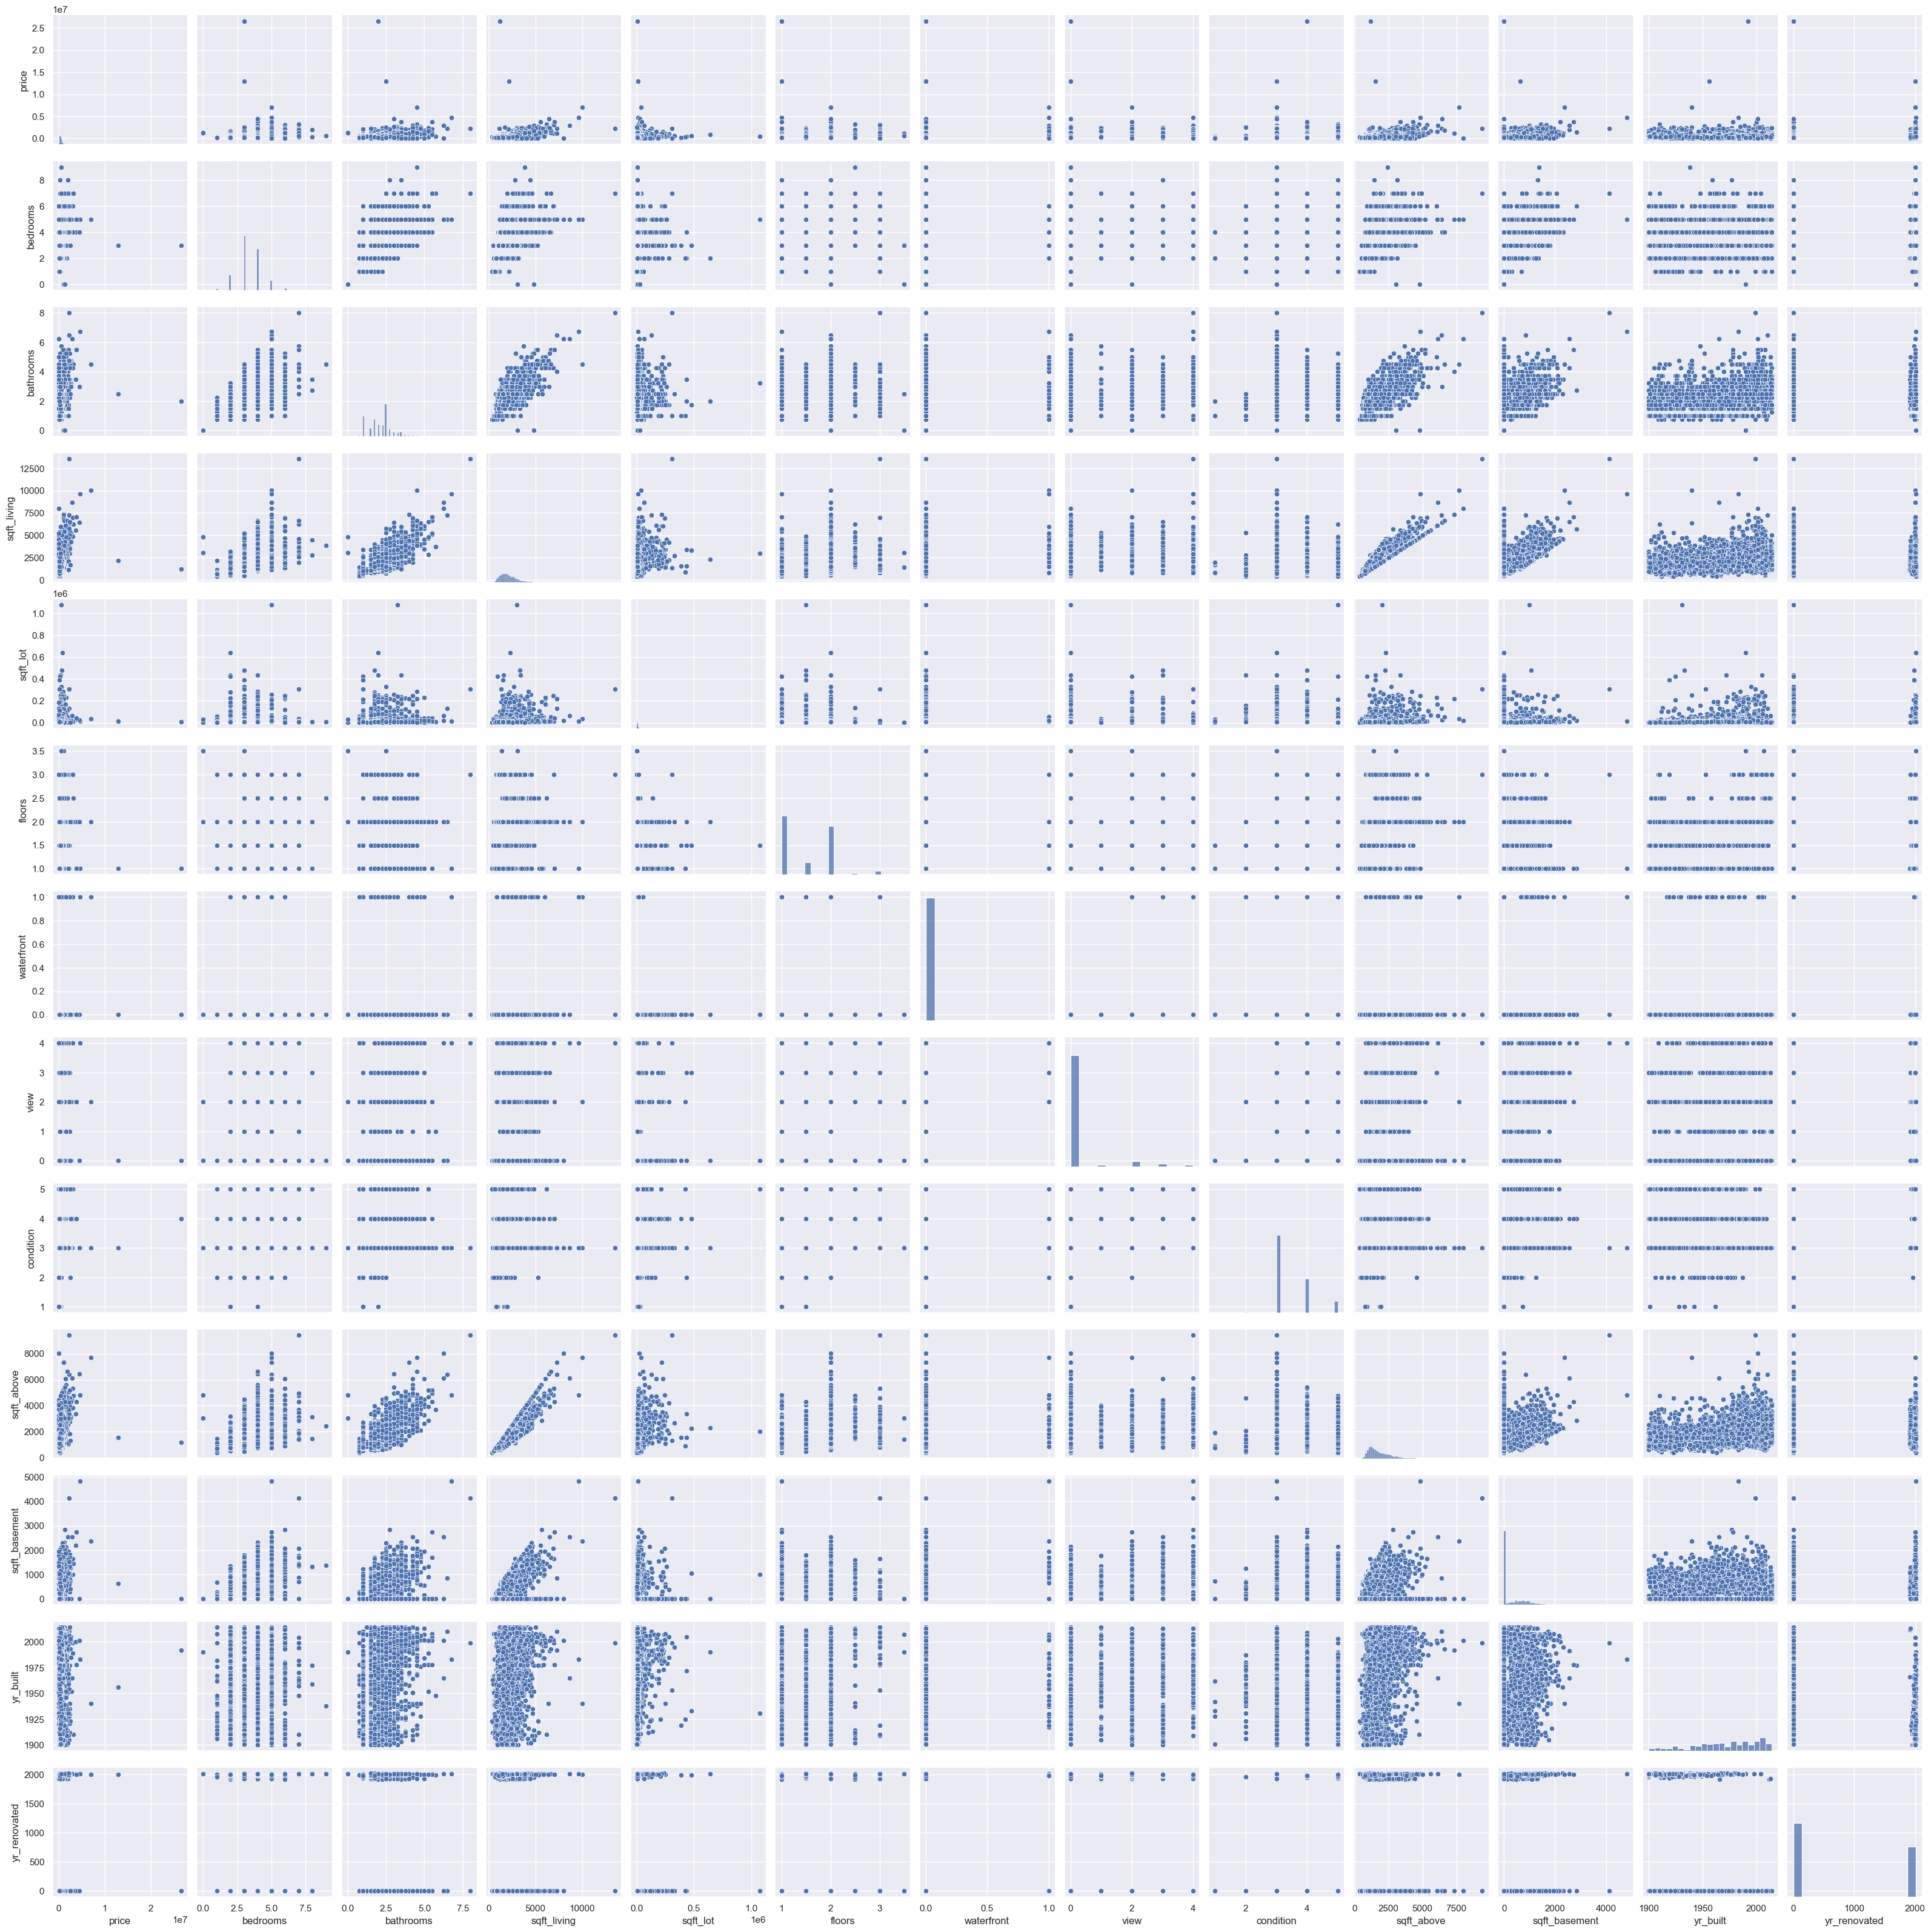

In [94]:
sns.pairplot(raw_data)